<a href="https://colab.research.google.com/github/Eduardo-Rivera98/Final-Project-Fundus-Analysis/blob/main/Model_Hypertension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import load
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x=load('drive/MyDrive/x.npy')

In [ ]:
y=load('y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from keras import models
from keras import layers
import tensorflow as tf
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 1))),
model.add(layers.MaxPooling2D(2, 2)),
model.add(layers.Conv2D(32, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Flatten()),
model.add(layers.Dense(512, activation='relu')),
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=10,verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
309/309 [==============================] - 292s 943ms/step - loss: 0.0565 - accuracy: 0.9827 - val_loss: 0.0675 - val_accuracy: 0.9789
Epoch 2/10
309/309 [==============================] - 291s 941ms/step - loss: 0.0356 - accuracy: 0.9902 - val_loss: 0.0332 - val_accuracy: 0.9882
Epoch 3/10
309/309 [==============================] - 292s 945ms/step - loss: 0.0542 - accuracy: 0.9852 - val_loss: 0.0387 - val_accuracy: 0.9870
Epoch 4/10
309/309 [==============================] - 291s 943ms/step - loss: 0.0192 - accuracy: 0.9954 - val_loss: 0.0303 - val_accuracy: 0.9895
Epoch 5/10
309/309 [==============================] - 291s 941ms/step - loss: 0.0401 - accuracy: 0.9889 - val_loss: 0.0781 - val_accuracy: 0.9753
Epoch 6/10
309/309 [==============================] - 291s 943ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0164 - val_accuracy: 0.9955
Epoch 7/10
309/309 [==============================] - 291s 942ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.0152 -

In [ ]:
y_pred=(model.predict(x_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1283
           1       0.99      1.00      1.00      1184

    accuracy                           1.00      2467
   macro avg       1.00      1.00      1.00      2467
weighted avg       1.00      1.00      1.00      2467



In [ ]:
precision_score(
y_test,
y_pred)

0.9932885906040269

(<Figure size 576x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd5d91e9410>)

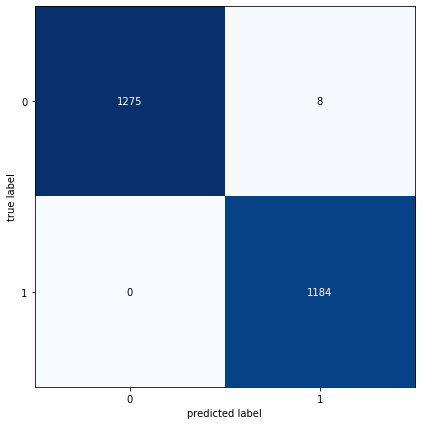

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7))

In [ ]:
model.save('drive/MyDrive/my_model_Hypertension.h5')

In [ ]:
drive.flush_and_unmount()